In [1]:
%pylab inline
import pandas as pd
from plotnine import *

Populating the interactive namespace from numpy and matplotlib


/Users/mattspinnelli/anaconda3/envs/ser627a/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('train.csv.gz', compression='gzip')
df.head()

from sklearn.model_selection import train_test_split


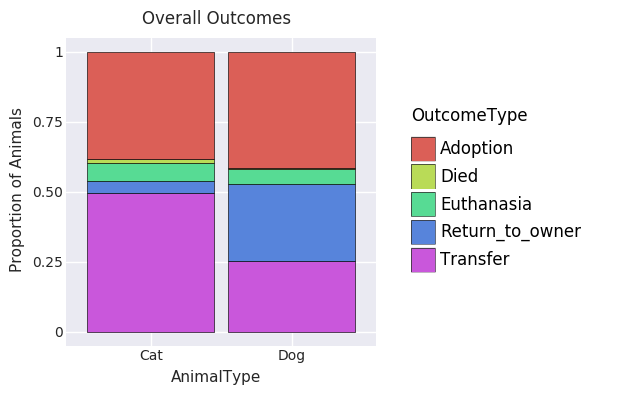

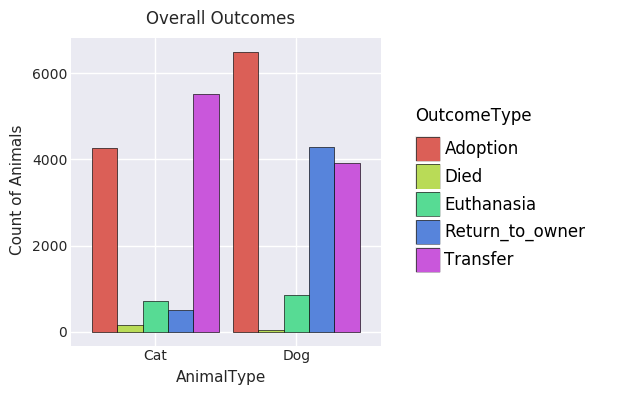

In [3]:
for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
    + geom_bar(position = position, color = 'black', size=.25)
    + labs(y = '{} of Animals'.format(label), title ='Overall Outcomes')
    + theme_seaborn()
    ).draw().set_size_inches(4,4)

/Users/mattspinnelli/anaconda3/envs/ser627a/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


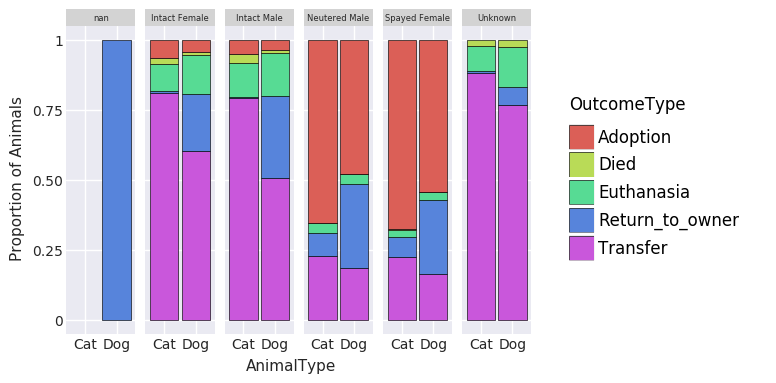

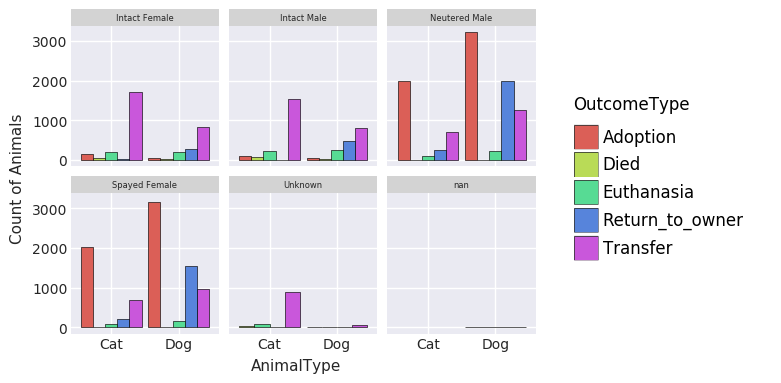

In [4]:
for (position, label) in [('fill', 'Proportion'), ('dodge', 'Count')]:
    p = (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
        + geom_bar(position = position, color = 'black', size=.25)
        + labs(y = '{} of Animals'.format(label))
        + theme_seaborn()
        + theme(strip_text_x = element_text(size = 6)))
    if position == 'fill':
        p += facet_grid('. ~ SexuponOutcome')
    else:
        p += facet_wrap('SexuponOutcome')
    p.draw()

In [5]:
df[df.SexuponOutcome.isnull()]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3174,A667395,Diego,2013-11-27 16:11:00,Return_to_owner,NaN,Dog,NaN,7 years,Dachshund,Brown Merle


In [6]:
df.iloc[3174].SexuponOutcome = 'Unknown'

In [7]:
M, F, U = 'Male', 'Female', 'Unknown'
def extract_sex(x):
    return M if M in str(x) else F if F in str(x) else U

N, S, I = 'Neutered', 'Spayed', 'Intact'    
def extract_genitals(x):
    return N if (N in str(x) or S in str(x)) else I if I in str(x) else U

df['Sex'] = df.SexuponOutcome.apply(extract_sex)
df['Genitals'] = df.SexuponOutcome.apply(extract_genitals)
 
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Genitals
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered


In [8]:
print("NaN count {}".format(len(df[df.AgeuponOutcome.isnull()])))

def convert_to_AgeInDays(x):
    if x is np.nan:
        return x
    numeric_portion, unit = str(x).split(' ')
    factor = {'year': 365, 'month': 30, 'week': 7, 'day': 1}
    return int(numeric_portion) * factor[unit.replace('s','')]

df['AgeInDays'] = df.AgeuponOutcome.map(convert_to_AgeInDays)

NaN count 18


In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median') # statsmodel.sandbox.MICE isn't avilable on kaggle 

cats = df.loc[df.AnimalType=='Cat', ['AgeInDays']]
dogs = df.loc[df.AnimalType=='Dog', ['AgeInDays']]

cats.fillna(cats.median(), inplace=True)
dogs.fillna(dogs.median(), inplace=True)

df.AgeInDays = pd.concat([cats, dogs])

In [10]:
most_pop_names = df.Name.value_counts().index.tolist()[:100]
df['MostPopNames'] = pd.Categorical(df.Name, categories=most_pop_names)

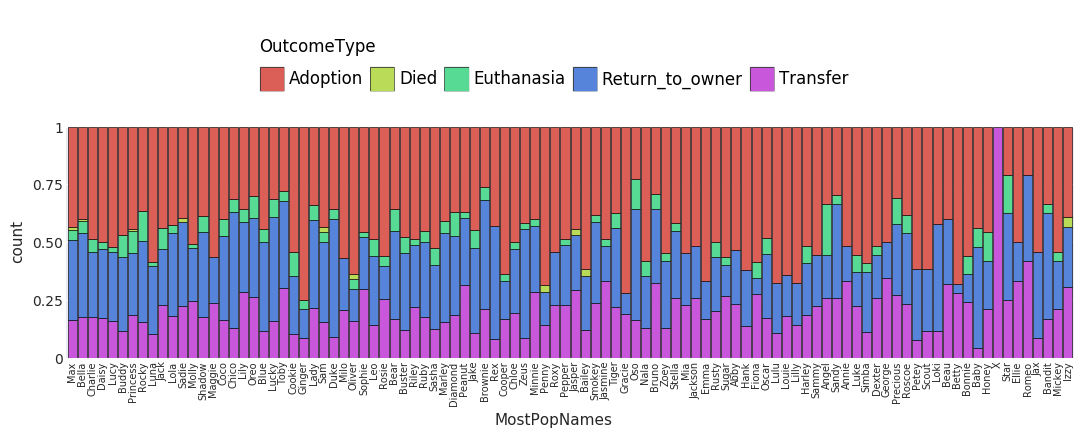

In [11]:
(ggplot(df[df.Name.isin(most_pop_names)], aes(x='MostPopNames', fill='OutcomeType'))
 + geom_bar(position='fill', color = 'black', size=.25)
 + theme_seaborn()
 + scale_y_continuous(expand = [0,0])
 + theme(axis_text_x = element_text(angle = 90, size = 7),
         legend_position = 'top')
).draw().set_size_inches(13, 3)

In [12]:
def has_name (x): 
    name = False if not x else x is not np.nan
    if str(x) == 'X':
        name = False
        
    return 'Named' if name else 'Unnamed'

df['HasName'] = df.Name.map(has_name)

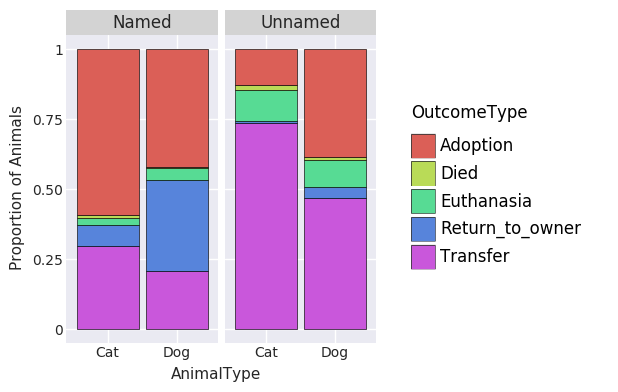

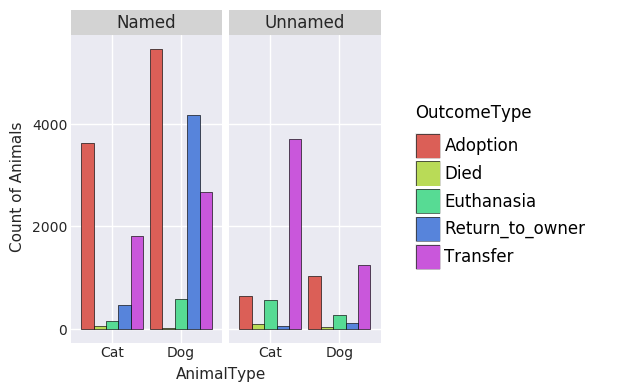

In [13]:
for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
     + geom_bar(position = position, color = 'black', size=.25)
     + facet_wrap('~HasName')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
    ).draw().set_size_inches(4,4)

In [14]:
df['AgeInDaysCategorical'] = pd.Categorical(df.AgeInDays)

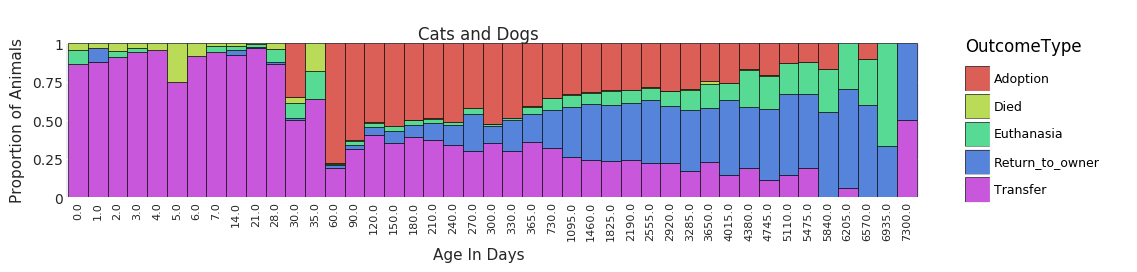

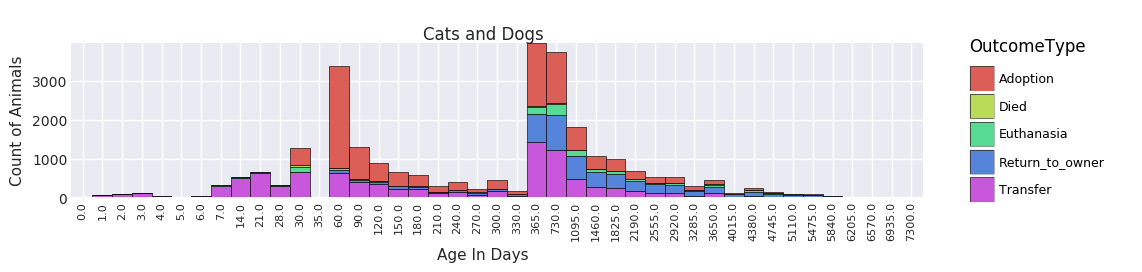

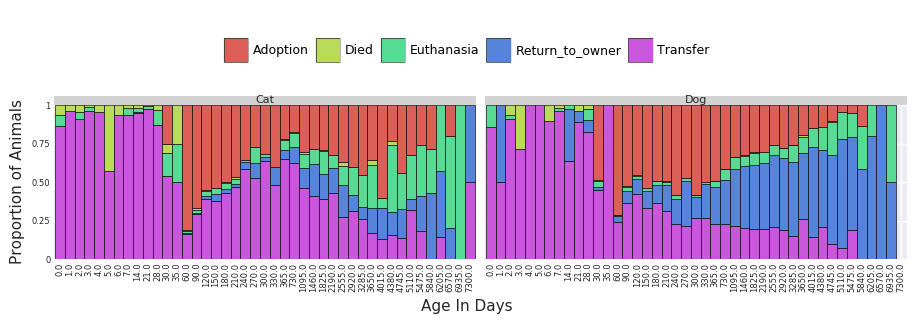

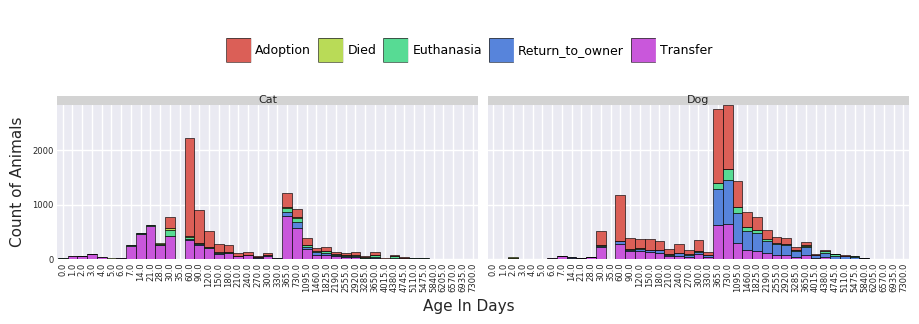

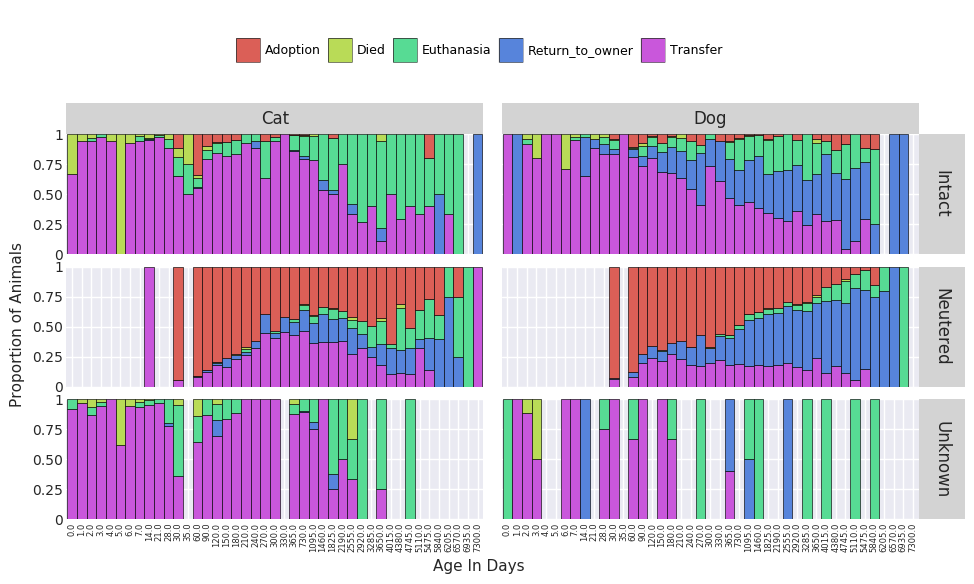

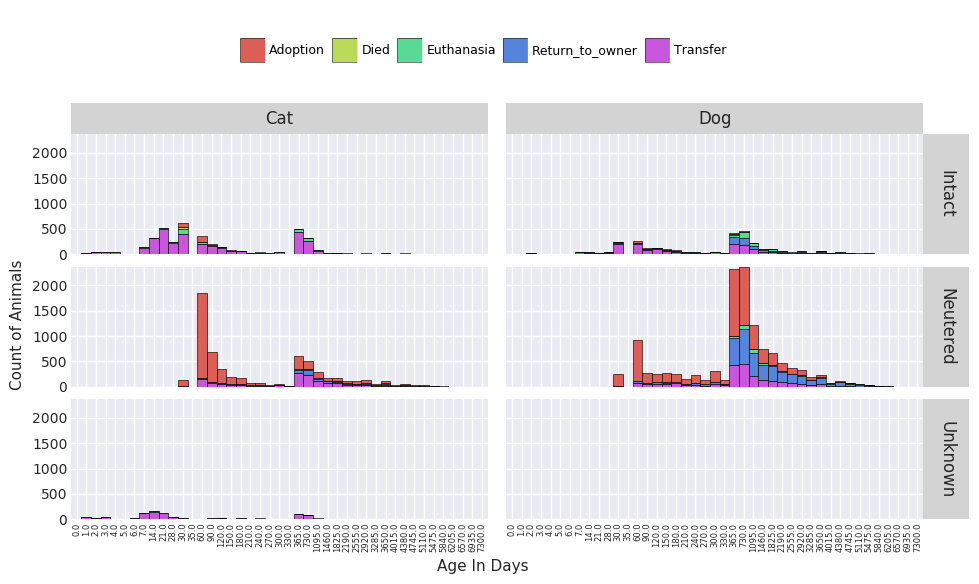

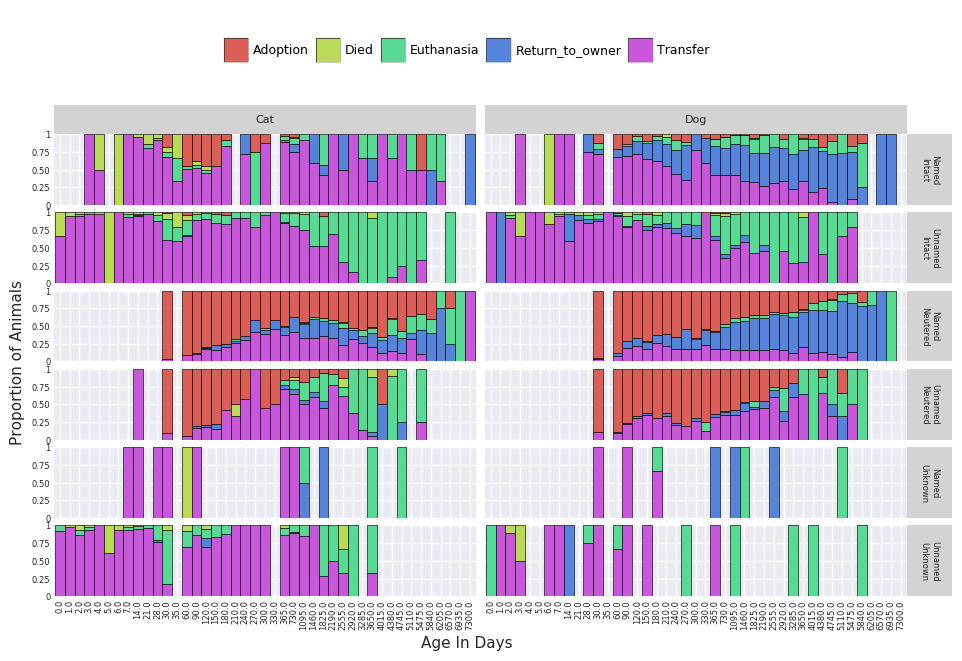

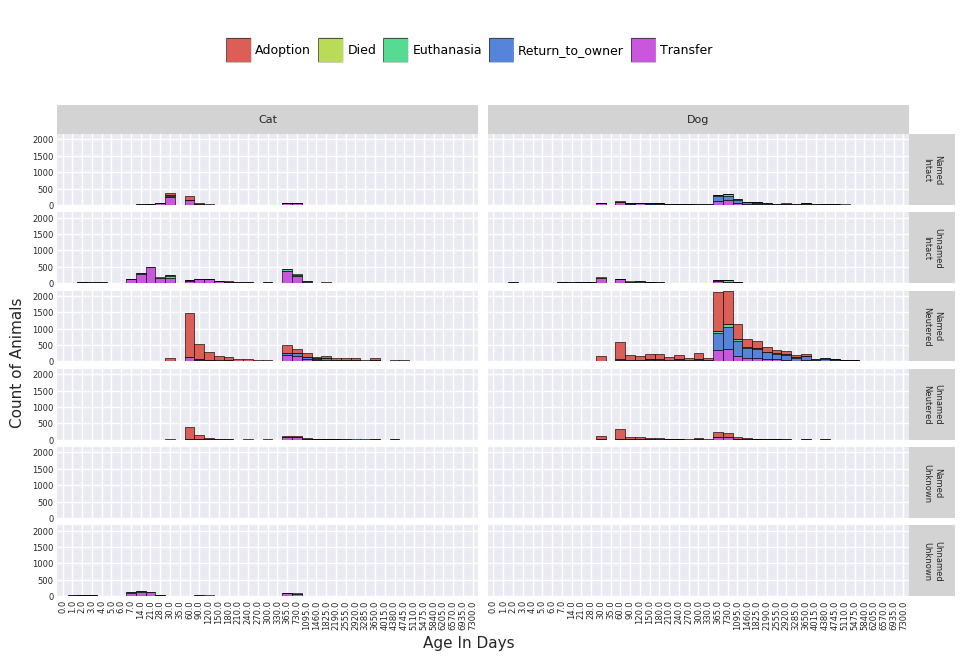

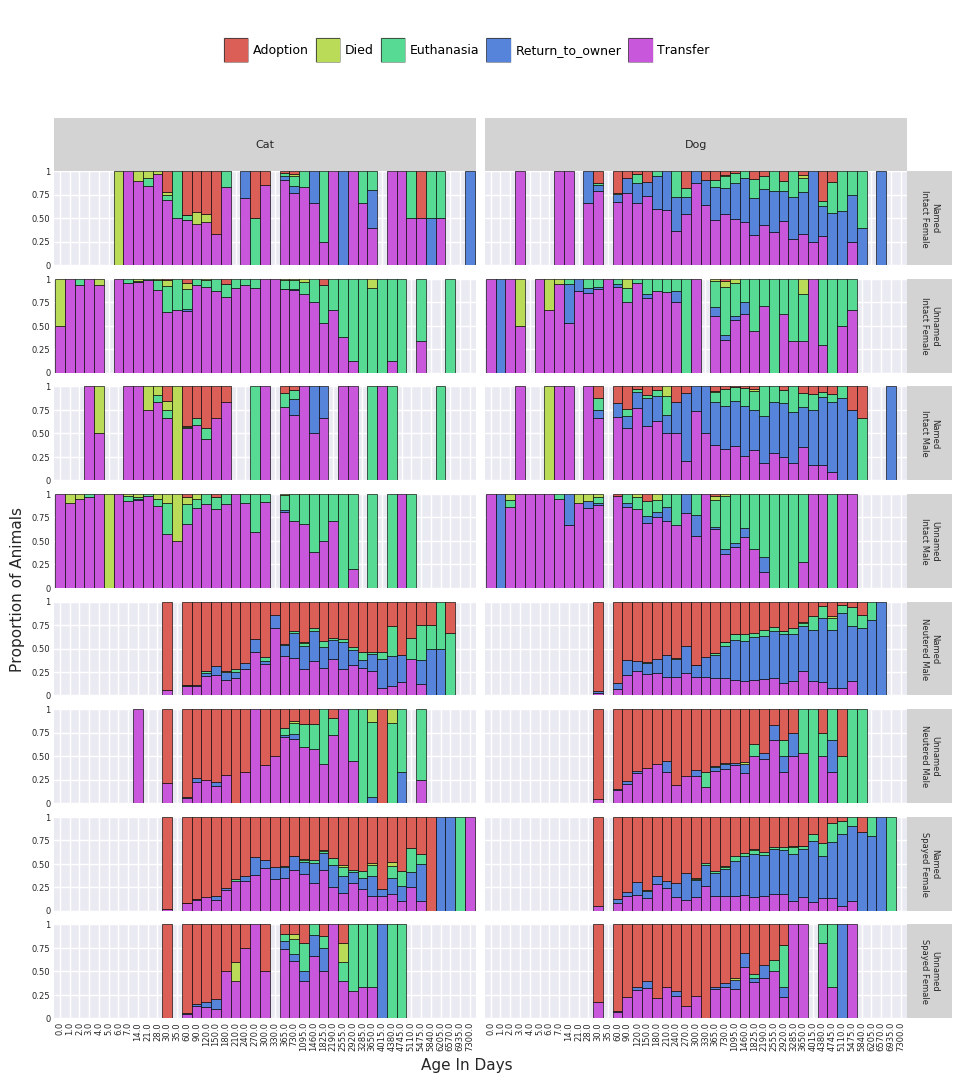

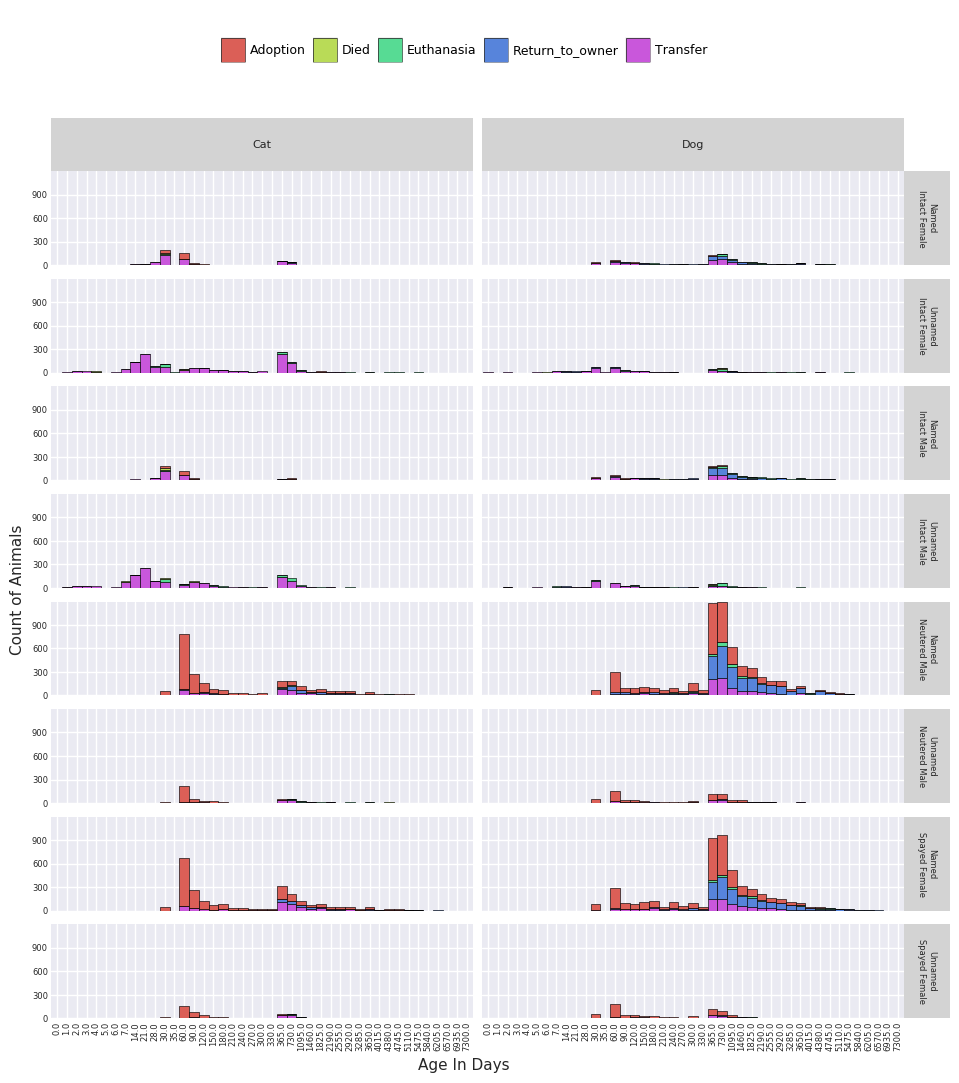

In [15]:
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label), title = 'Cats and Dogs')
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             panel_grid_minor = element_blank(),
             legend_text=element_text(size=9))
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11, 2)
    
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('. ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             axis_text_y = element_text(size = 6),
             strip_text_x = element_text(size = 8),
             panel_grid_minor = element_blank(),
             legend_position = 'top',
             panel_spacing = 0.05,
             legend_title = element_blank(),
             legend_text=element_text(size=9))
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,2)
    
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p =(ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('Genitals ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             panel_grid_minor = element_blank(),
             legend_text=element_text(size=9),
             legend_position = 'top',
             legend_title = element_blank())
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,5)
    
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df, aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('Genitals + HasName ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             axis_text_y = element_text(size = 6),
             panel_grid_minor = element_blank(),
             legend_position = 'top',
             panel_spacing = 0.05,
             legend_title = element_blank(),
             strip_text_x = element_text(size = 8),             
             strip_text_y = element_text(size = 6),
             legend_text=element_text(size=9))
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,6)
    
# Unknown captured above so don't need to "zoom" in here
for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    p = (ggplot(df[df.SexuponOutcome != 'Unknown'], aes(x = 'AgeInDaysCategorical', fill = 'OutcomeType'))
     + geom_bar(position = position, width=1, color='black', size=0.25)     
     + facet_grid('SexuponOutcome + HasName ~ AnimalType')
     + labs(x = 'Age In Days', y = '{} of Animals'.format(label))
     + coord_cartesian(ylim=[0, 1])
     + theme_seaborn()
     + theme(axis_text_x = element_text(angle = 90, size = 6),
             axis_text_y = element_text(size = 6),
             panel_grid_minor = element_blank(),
             legend_position = 'top',
             panel_spacing = 0.05,
             legend_title = element_blank(),
             legend_text=element_text(size=9),
             strip_text_x = element_text(size = 8),
             strip_text_y = element_text(size = 6))
    )    
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000), expand = [0,0])
    else:
        p += scale_y_continuous(expand = [0,0])
    p.draw().set_size_inches(11,11)

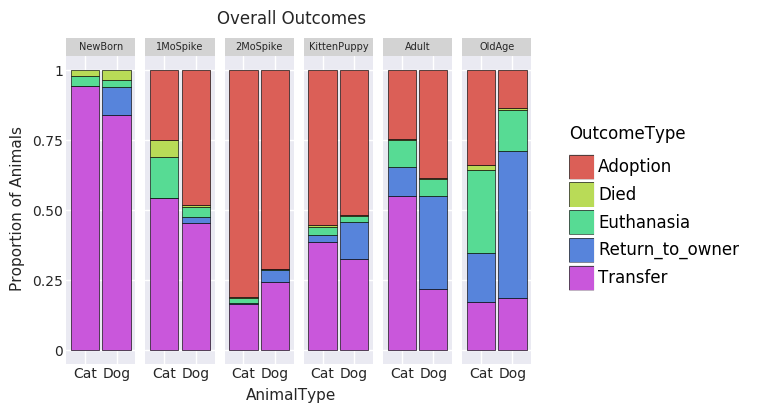

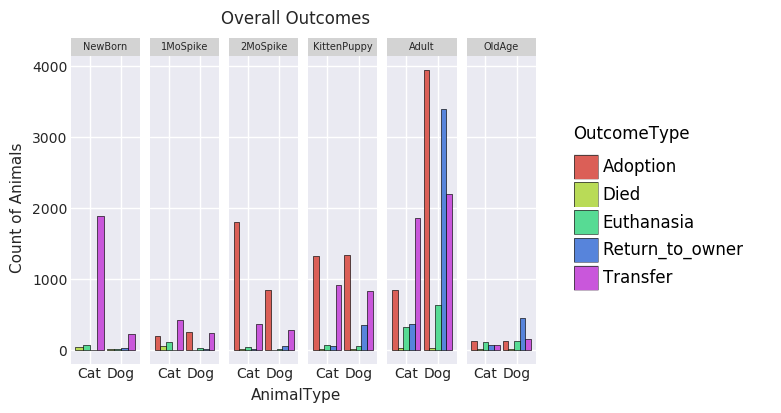

In [16]:
def stage(x):
    if x <= 28:
        return 'NewBorn'
    elif x > 28 and x <= 35:
        return '1MoSpike'
    elif x > 35 and x <= 60:
        return '2MoSpike'
    elif x > 60 and x < 365:
        return 'KittenPuppy'
    elif x >= 365 and x < 10 * 365:
        return 'Adult'
    elif x >= 10 * 356:
        return 'OldAge'    
    
df['Stage'] = df.AgeInDays.map(stage)
df.Stage = pd.Categorical(df.Stage, categories=[
    'NewBorn', '1MoSpike', '2MoSpike', 'KittenPuppy', 'Adult', 'OldAge'])

for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
     + geom_bar(position = position, color = 'black', size=.25)
     + facet_grid('. ~ Stage')
     + labs(y = '{} of Animals'.format(label), title ='Overall Outcomes')
     + theme_seaborn()
     + theme(strip_text_x = element_text(size = 7))
    ).draw()

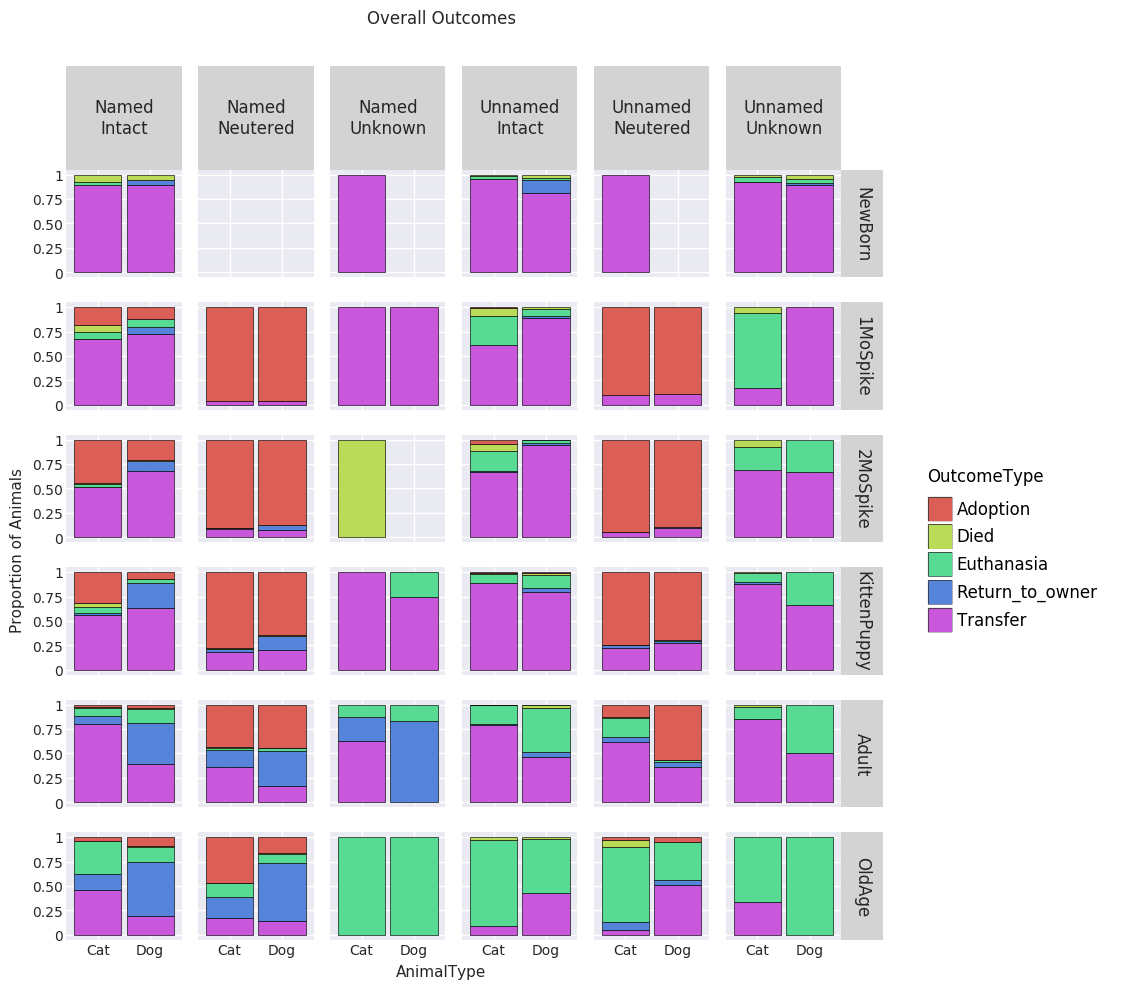

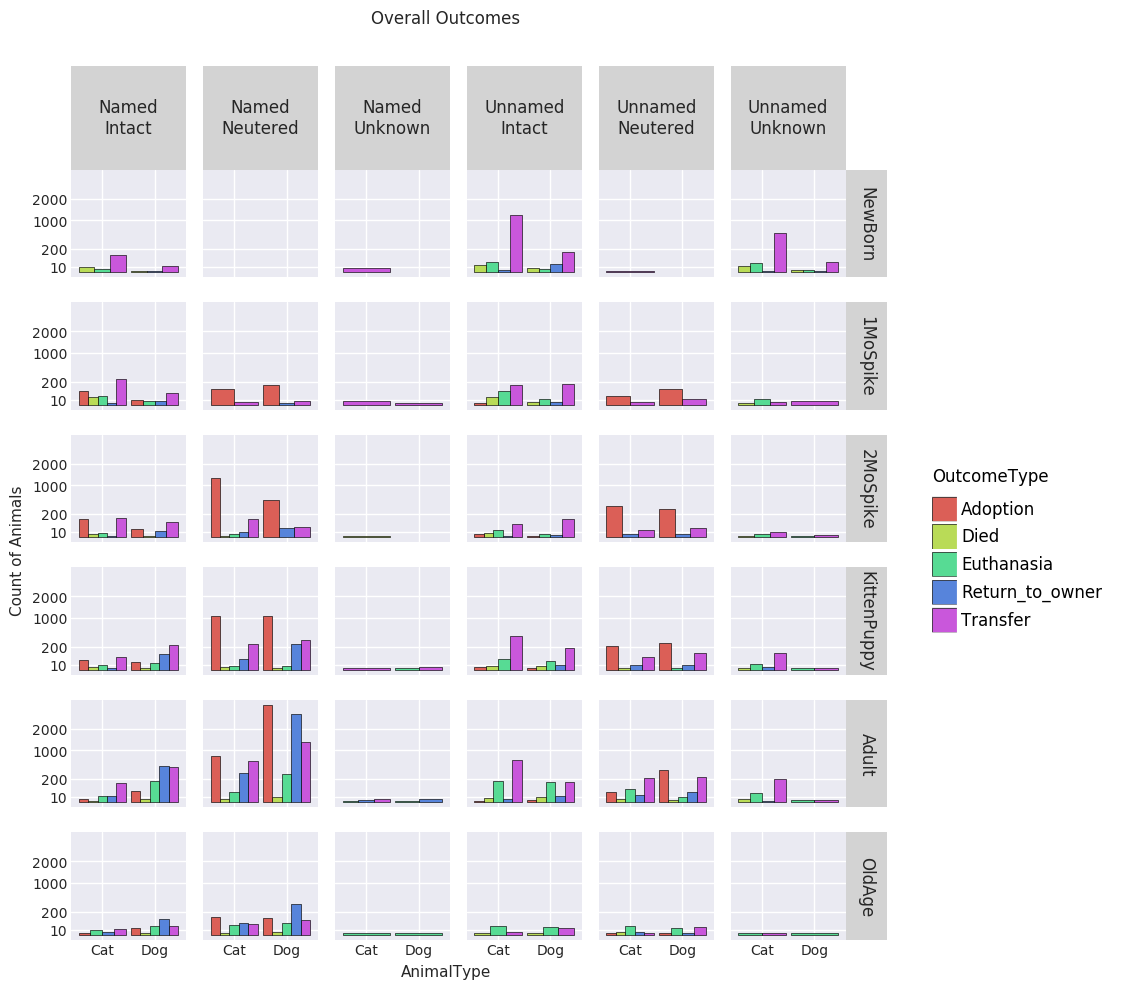

In [17]:
for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    p = (ggplot(df, aes(x = 'AnimalType', fill = 'OutcomeType'))
     + geom_bar(position = position, color = 'black', size=.25)
     + facet_grid('Stage ~ HasName + Genitals')
     + labs(y = '{} of Animals'.format(label), title ='Overall Outcomes')
     + theme_seaborn()
    )
    if position == 'dodge':
        p += scale_y_sqrt(breaks=(10, 200, 1000, 2000))
    p.draw().set_size_inches(10,10)

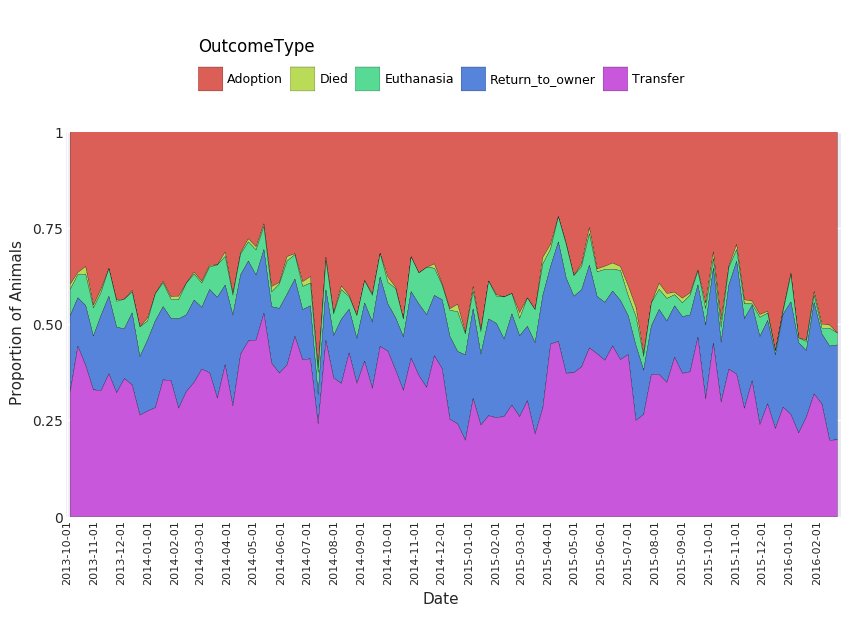

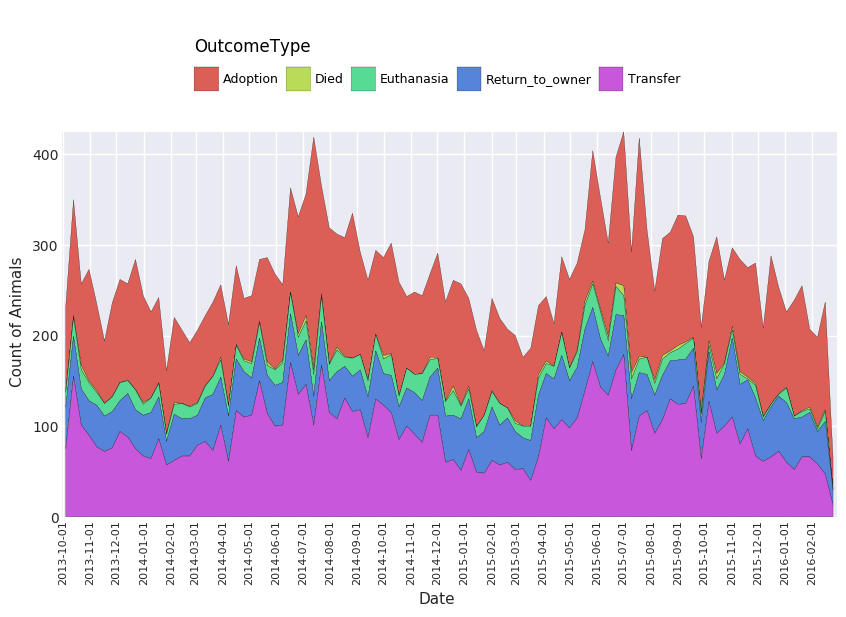

In [18]:
from datetime import datetime
from mizani.breaks import date_breaks
df['Date'] = df.DateTime.map(
    lambda x: x if x is nan else datetime.strptime(str(x).split(' ')[0], '%Y-%m-%d'))
df['Time'] = df.DateTime.map(
    lambda x: x if x is nan else datetime.strptime(str(x).split(' ')[1], '%H:%M:%S'))

for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    (ggplot(df, aes(x = 'Date', fill ='OutcomeType'))
     + geom_area(stat='bin', bins=100, position = position, size=0.1, color='black')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
     + theme(legend_position = 'top')
     + scale_x_datetime(breaks = date_breaks("1 Month"), expand=(0,0))
     + scale_y_continuous(expand=(0,0))
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             legend_text=element_text(size=9))
    ).draw().set_size_inches(10, 5)

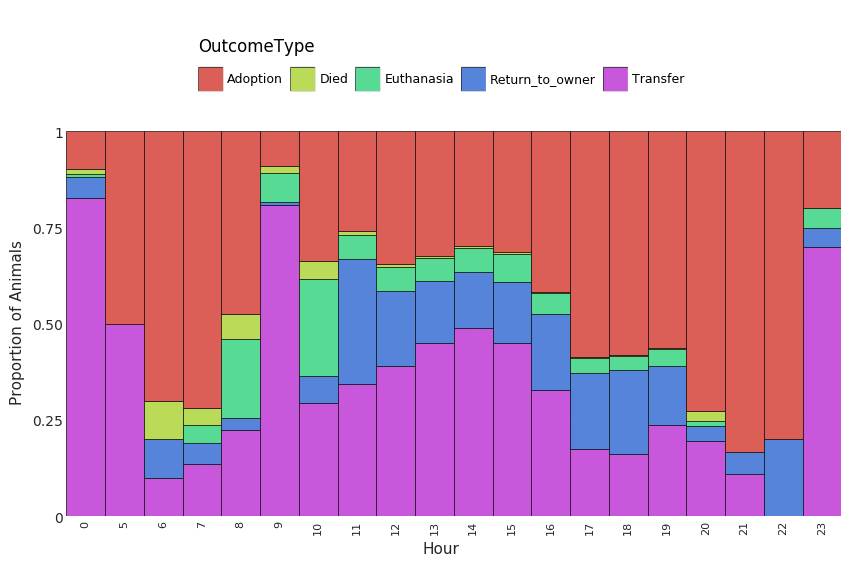

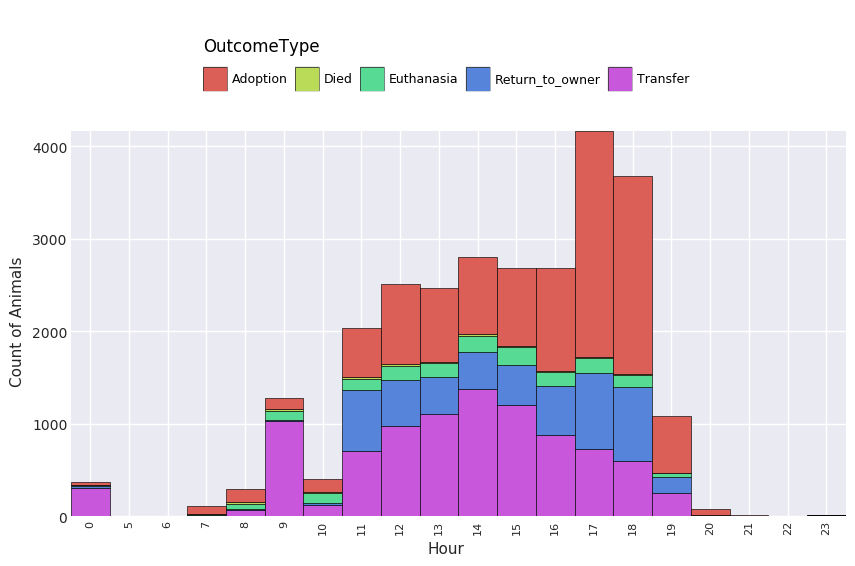

In [19]:
def get_time_of_day(t):
    dt = datetime.strptime(t, r"%Y-%m-%d %H:%M:%S")
    return dt.hour

df["Hour"] = pd.Categorical(df.DateTime.apply(get_time_of_day))

for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    (ggplot(df, aes(x = 'Hour', fill ='OutcomeType'))
     + geom_bar(position = position, width=1, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + scale_x_discrete(expand=(0,0))
     + scale_y_continuous(expand=(0,0))
     + theme_seaborn()
     + theme(legend_position = 'top')
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             legend_text=element_text(size=9))
    ).draw().set_size_inches(10, 5)

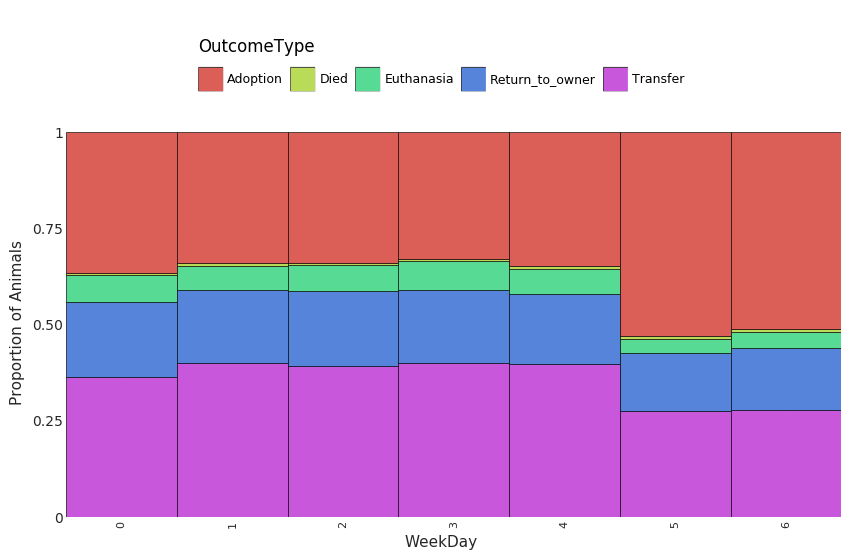

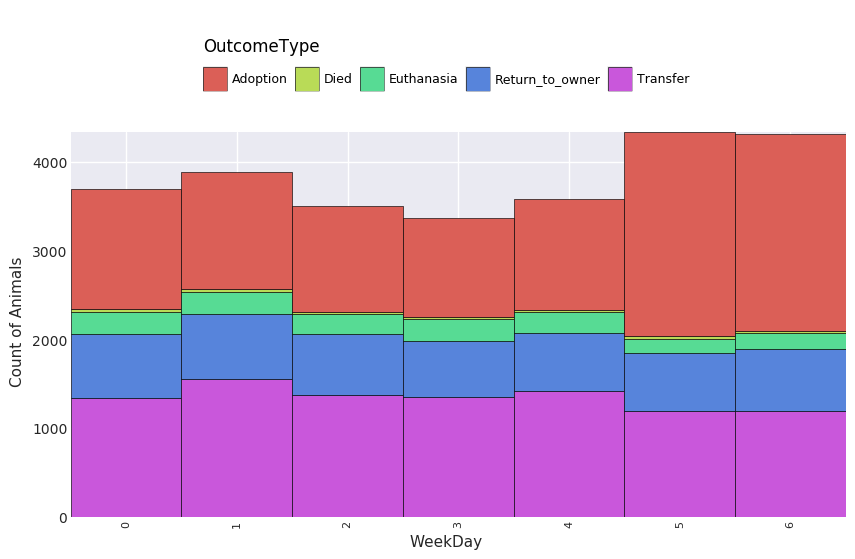

In [20]:
def get_day_of_week(t):
    dt = datetime.strptime(t, r"%Y-%m-%d %H:%M:%S")
    return dt.weekday()

df["WeekDay"] = pd.Categorical(df.DateTime.apply(get_day_of_week))

for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    (ggplot(df, aes(x = 'WeekDay', fill ='OutcomeType'))
     + geom_bar(position = position, width=1, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + scale_x_discrete(expand=(0,0))
     + scale_y_continuous(expand=(0,0))
     + theme_seaborn()
     + theme(legend_position = 'top')
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             legend_text=element_text(size=9))
    ).draw().set_size_inches(10, 5)

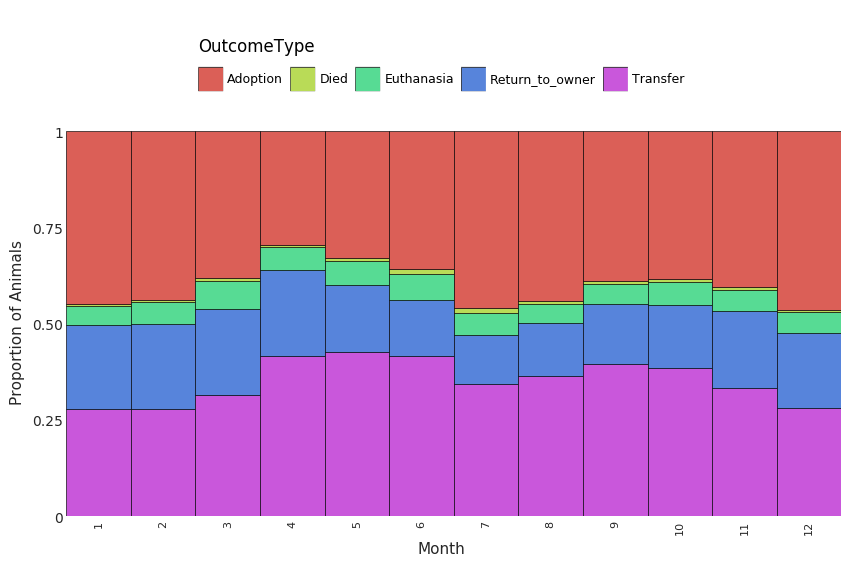

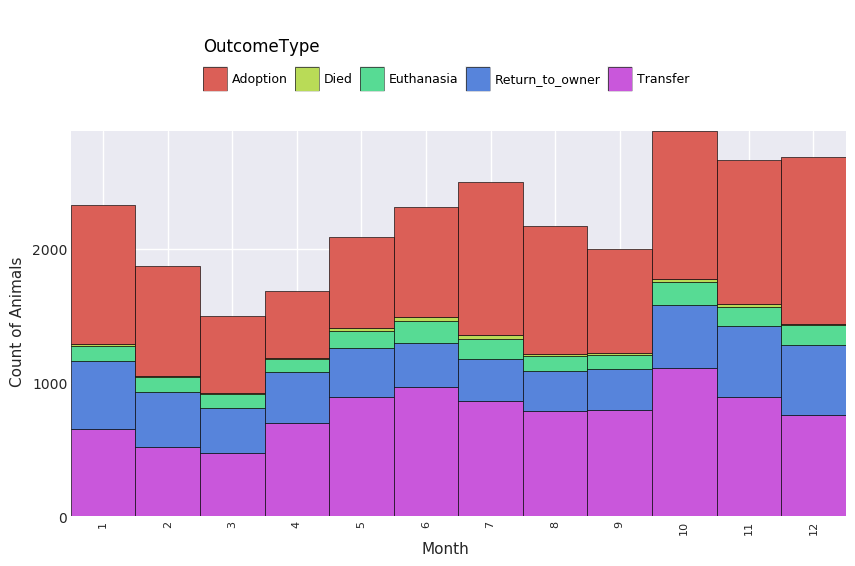

In [21]:
def get_month_of_year(t):
    dt = datetime.strptime(t, r"%Y-%m-%d %H:%M:%S")
    return dt.month

# adding feature Month
df["Month"] = pd.Categorical(df.DateTime.apply(get_month_of_year))

for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    (ggplot(df, aes(x = 'Month', fill ='OutcomeType'))
     + geom_bar(position = position, width=1, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + scale_x_discrete(expand=(0,0))
     + scale_y_continuous(expand=(0,0))
     + theme_seaborn()
     + theme(legend_position = 'top')
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             legend_text=element_text(size=9))
    ).draw().set_size_inches(10, 5)

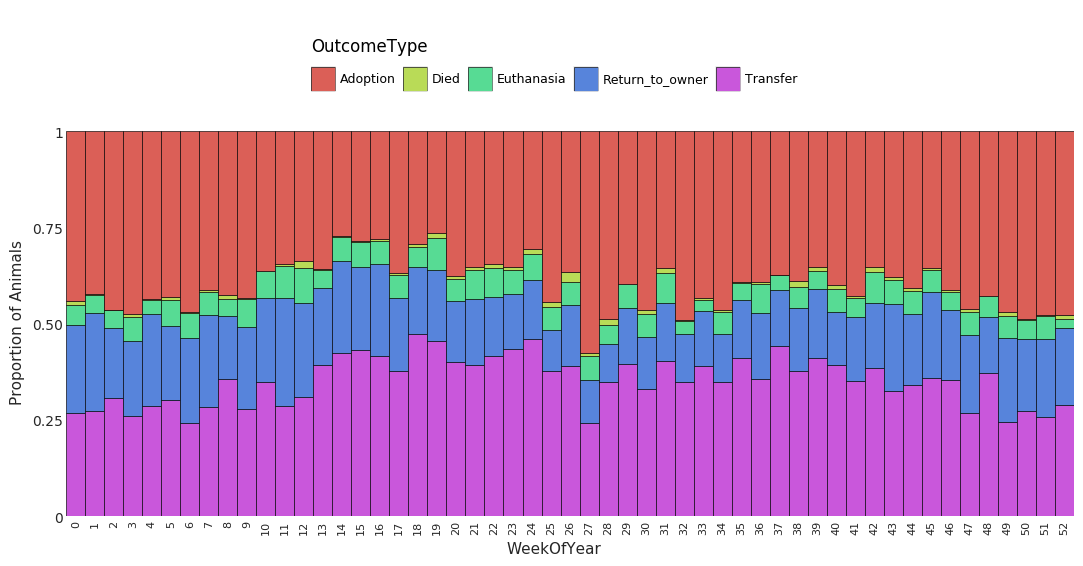

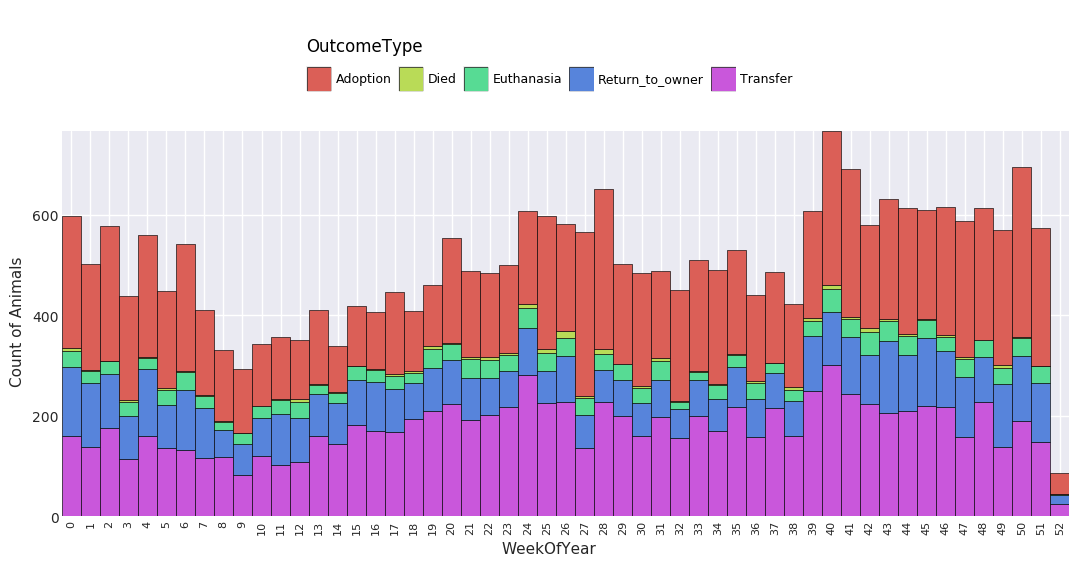

In [22]:
def get_week_of_year(t):
    dt = datetime.strptime(t, r"%Y-%m-%d %H:%M:%S")
    return (dt - datetime(dt.year, 1, 1)).days / 7

df["WeekOfYear"] = pd.Categorical(df.DateTime.apply(get_week_of_year))

for position, label in [('fill', 'Proportion'), ('stack', 'Count')]:
    (ggplot(df, aes(x = 'WeekOfYear', fill ='OutcomeType'))
     + geom_bar(position = position, width=1, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + scale_x_discrete(expand=(0,0))
     + scale_y_continuous(expand=(0,0))
     + theme_seaborn()
     + theme(legend_position = 'top')
     + theme(axis_text_x = element_text(angle = 90, size = 8),
             legend_text=element_text(size=9))
    ).draw().set_size_inches(13, 5)

In [23]:
import holidays
from dateutil.relativedelta import relativedelta
from datetime import date
class MyHolidays(holidays.UnitedStates):
    def _populate(self, year):
        # Populate the holiday list with the default US holidays
        holidays.UnitedStates._populate(self, year)
        self[date(year, 2, 14)] = "Valentines Day"
        self[date(year, 1, 1) + relativedelta(weekday=MO(+3))] = "Martin Luther King Day"
        self[date(year, 2, 1) + relativedelta(weekday=MO(+3))] = "President's Day"
        self[date(year, 5, 1) + relativedelta(weekday=SU(+2))] = "Mother's Day"
        self[date(year, 6, 1) + relativedelta(weekday=SU(+3))] = "Father's Day"
        self[date(year, 10, 31)] = "Halloween"

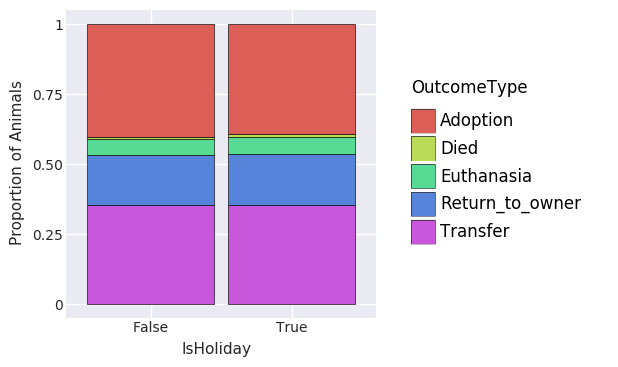

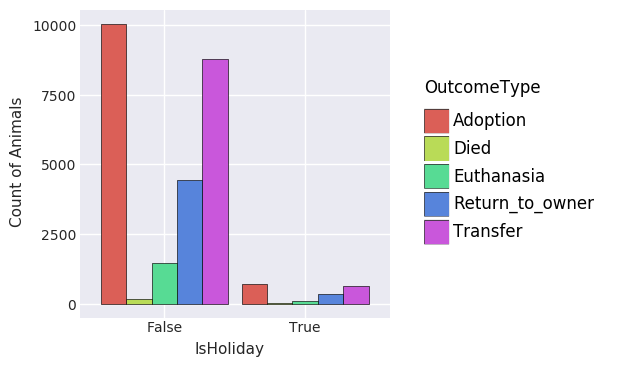

In [24]:
tx_holidays = MyHolidays(state="TX", years = [2013, 2014, 2015, 2016])
def is_holiday(t):
    dt = datetime.strptime(t, r"%Y-%m-%d %H:%M:%S")
    if dt.date() in tx_holidays:
        return True
    return False

df["IsHoliday"] = pd.Categorical(df.DateTime.apply(is_holiday))

for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'IsHoliday', fill ='OutcomeType'))
     + geom_bar(position = position, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
    ).draw().set_size_inches(4,4)

In [25]:
import urllib2
from bs4 import BeautifulSoup

url = "http://www.sorteaze.com/dog-breed-personality--social-traits.html"
page = urllib2.urlopen(url).read()
soup = BeautifulSoup(page, "lxml")

data = []
for tr in soup.find_all('tr')[4:218]:
    tds = tr.find_all('td')
    data.append([td.text.encode('utf-8').strip() for td in tds])

columns = [th.text.encode('utf-8').strip() for th in soup.find_all('th')]
dog_personality = pd.DataFrame(data, columns=columns)


In [26]:
url = "http://www.sorteaze.com/dog-breeds.html"
page = urllib2.urlopen(url).read()
soup = BeautifulSoup(page, "lxml")

data = []
for tr in soup.find_all('tr')[3:217]:
    tds = tr.find_all('td')
    data.append([td.text.encode('utf-8').strip() for td in tds])
    
columns = [th.text.encode('utf-8').strip() for th in soup.find_all('th')]

dog_traits = pd.DataFrame(data, columns=columns)

In [27]:
dog_data = pd.merge(dog_personality, dog_traits, on='Breed Name', how='outer')
dog_data = dog_data.drop(['Other Names', 'Bred for'], axis=1)

In [28]:
breedstring = df.loc[78,"Breed"]

In [29]:
def breed_parser(name):
    tokens = name.split("/")
    breed = []
    for b in tokens:
        if "Mix" in b:
            b = b.replace(" Mix", "")
        breed.append(b)
    return breed

In [30]:
lst = breed_parser(breedstring)

In [31]:
def add_dog_data(x):   
    breeds = breed_parser(x.Breed)   
    matches = (dog_data['Breed Name'].str.contains(x) for x in breeds)
    return pd.Series(dog_data[any(column_stack(matches), axis=1)].iloc[:,1:]
                     .as_matrix()
                     .astype(int)
                     .mean(0))
    
columns=[x.encode('utf-8').strip() for x in dog_data.columns[1:]]
df[columns] = df[df.AnimalType == 'Dog'].apply(add_dog_data, axis=1)

/Users/mattspinnelli/anaconda3/envs/ser627a/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/Users/mattspinnelli/anaconda3/envs/ser627a/lib/python2.7/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


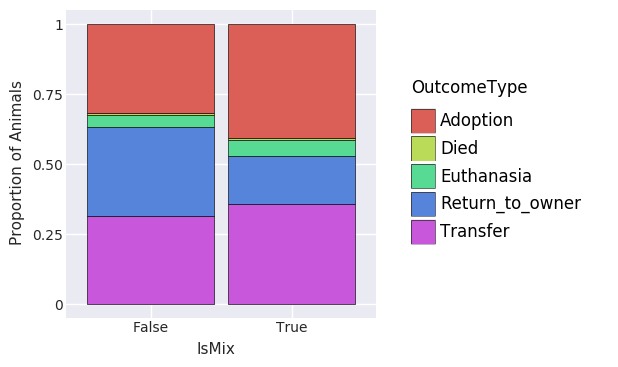

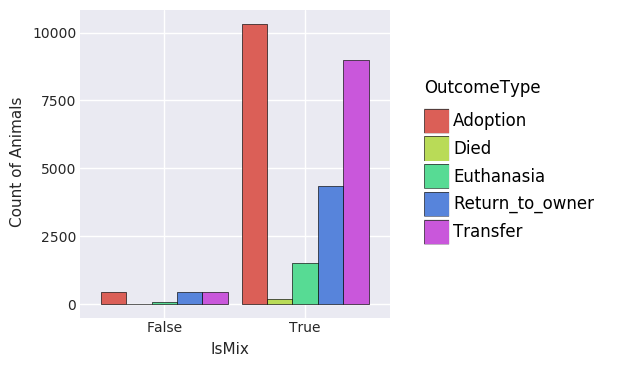

In [32]:
df['IsMix'] = pd.Categorical(df.Breed.map(lambda x: any([s in str(x) for s in ['Mix', '/']])))

for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'IsMix', fill ='OutcomeType'))
     + geom_bar(position = position, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
    ).draw().set_size_inches(4,4)

Long       0.049308
Medium     0.079307
Short      0.807347
Unknown    0.064038
Name: Hair, dtype: float64


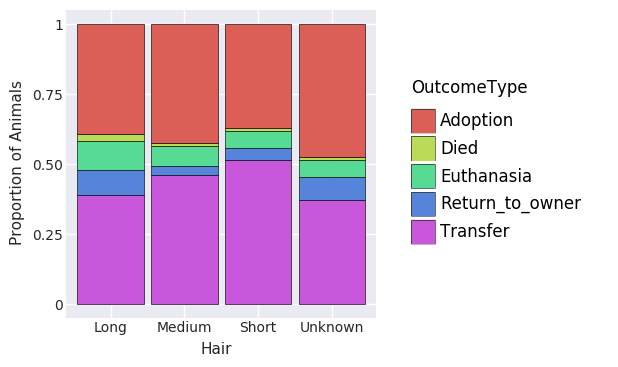

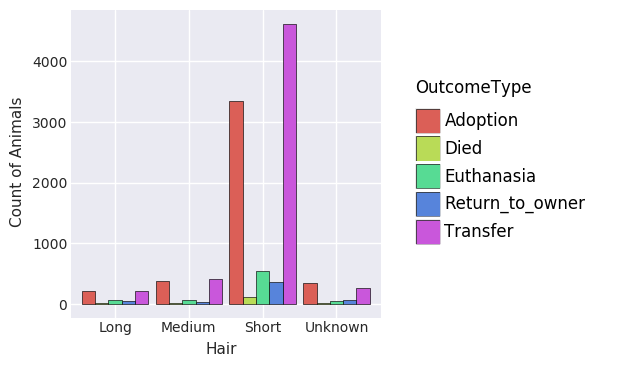

In [33]:
def hair(x):
    if 'Short' in str(x):
        return 'Short'
    elif 'Medium' in str(x):
        return 'Medium'
    elif 'Long' in str(x):
        return 'Long'
    else:
        return 'Unknown'

df.loc[df.AnimalType == 'Cat', 'Hair'] = df.Breed.map(hair)
df.loc[df.AnimalType == 'Dog', 'Hair'] = np.nan

temp = df[df.AnimalType == "Cat"].Hair.value_counts()
full_dist = (temp/temp.sum()).sort_index()
print(full_dist)

for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df[df.AnimalType == "Cat"], aes(x = 'Hair', fill ='OutcomeType'))
     + geom_bar(position = position, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
    ).draw().set_size_inches(4,4)

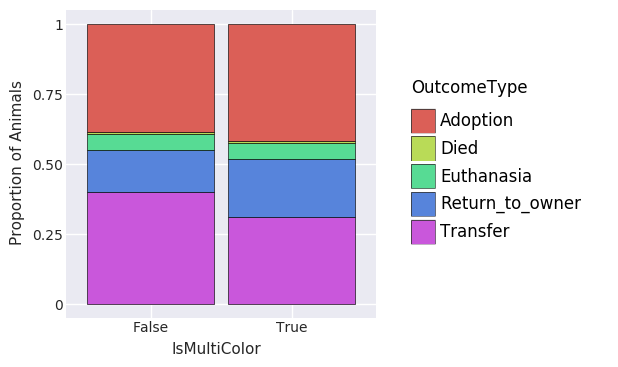

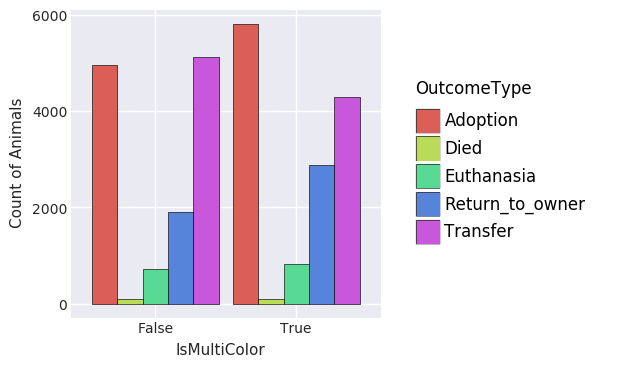

In [34]:
df['IsMultiColor'] = pd.Categorical(df.Color.map(lambda x: '/' in str(x)))

for position, label in [('fill', 'Proportion'), ('dodge', 'Count')]:
    (ggplot(df, aes(x = 'IsMultiColor', fill ='OutcomeType'))
     + geom_bar(position = position, size=0.25, color='black')
     + labs(y = '{} of Animals'.format(label))
     + theme_seaborn()
    ).draw().set_size_inches(4,4)

In [35]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,Avg Weight (pounds),Size Score (1 to 5),Avg Age,Fewer Health Issues,Energetic,Intelligent,Easy to Train,IsMix,Hair,IsMultiColor
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,...,28.0,2.0,13.0,3.0,3.0,5.0,5.0,True,NaN,True
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Short,False
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,...,60.0,4.0,12.0,3.0,4.0,4.0,3.0,True,NaN,True
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Short,False
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,...,15.0,2.0,14.0,4.0,2.0,4.0,2.0,True,NaN,False


In [36]:
df.to_csv('animals2.csv')